### Business Problem - Identify whether the message is spam or not

### Data Collection - The data is collected from UCI repository, the data obtained was in tab separated format, 
url for which is given below:
https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [1]:
## Import necessary libraries
import pandas as pd

In [2]:
## Read the data
msg=pd.read_csv('/Users/komalrungta/Downloads/smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','message'])

In [3]:
## check the data
msg.head(10)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Data cleaning and preprocessing
message column has lot of comma,full stop,question mark,some words in capital letter, words like 'the','to','an','we',
etc. which are not considered as a good indicator of spam classifier. Below are the few techniques we are going to apply:-

* lower the sentence
* We are going to remove stopwords
* Stemming
* create a bag of words

In [4]:
## Import necessary libraries
import re  ## to remove comma,full stop,question mark
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
## Instantiate Stemmer
ps=PorterStemmer()

In [6]:
## generate corpus after cleaning
corpus=[]
for i in range (0 , len(msg)):
    review=re.sub('[^a-zA-Z]','',msg['message'][i])
    review=review.lower()  ##lowercase
    review=review.split()  ## split each & every sentences to get list of words
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]#remove stopwords & do stemming
    review=' '.join(review) ## to join list of words to sentence
    corpus.append(review)

In [7]:
## view a corpus
corpus[10]

'imgonnabehomesoonandidontwanttotalkaboutthisstuffanymoretonightkivecriedenoughtoday'

In [8]:
## creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
## initialize CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
## check the shape of X
X.shape

(5572, 5080)

#### This indicates that there are 5080 columns (words) in X out of which only some of the words may not be frequently present, so lets take only 3500 columns initially to create our first model

In [9]:
## initialize CountVectorizer with max_features = 3500
cv=CountVectorizer(max_features = 3500)
X=cv.fit_transform(corpus).toarray()
## check the shape of X
X.shape

(5572, 3500)

In [10]:
## encoding our target variable
y=pd.get_dummies(msg.labels)
## check y
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


##### It's encoding 'ham' to '1' and spam to '0' when message is 'ham' and vice-versa.
##### let's have only one representation of the target feature instead.

In [11]:
## let's represent y with 'spam' only, spam = 0 means its 'ham', if spam = 1 means its 'spam'
y=y.iloc[:,1].values
## check y
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [12]:
## create train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
## check the size of the splits
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4457, 3500), (1115, 3500), (4457,), (1115,))

#### In order to solve the problem we are using Naive Bayes as it works very well w.r.t NLP

In [13]:
## create the model
from sklearn.naive_bayes import MultinomialNB
## initialize the model
spam_detect_model=MultinomialNB()
## fit the data
spam_detect_model.fit(X_train,y_train)

MultinomialNB()

In [14]:
## Make predictions
y_pred=spam_detect_model.predict(X_test)
## check y_pred
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
## create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[955,   0],
       [156,   4]])

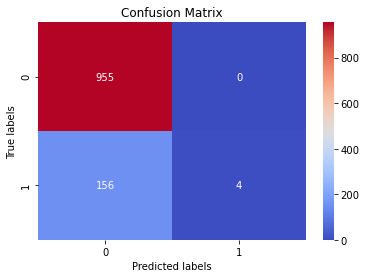

In [16]:
## plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='coolwarm');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['ham', 'spam']); ax.yaxis.set_ticklabels(['ham', 'spam']);

In [17]:
## Let's check accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8600896860986547

In [18]:
### Let's try to improve it with lemmatization
from nltk.stem import WordNetLemmatizer
## initializing
lem=WordNetLemmatizer()
## generate corpus after cleaning
corpus_lem=[]
for i in range (0 , len(msg)):
    review_lem=re.sub('[^a-zA-Z]','',msg['message'][i])
    review_lem=review_lem.lower()  ##lowercase
    review_lem=review_lem.split()  ## split each & every sentences to get list of words
    review_lem=[lem.lemmatize(word) for word in review_lem if word not in stopwords.words('english')]#remove stopwords & do stemming
    review_lem=' '.join(review_lem) ## to join list of words to sentence
    corpus_lem.append(review_lem)
## view a corpus
corpus_lem[10]

'imgonnabehomesoonandidontwanttotalkaboutthisstuffanymoretonightkivecriedenoughtoday'

In [19]:
## create bag of words
X_lem=cv.fit_transform(corpus_lem).toarray()
## check the shape of X
X_lem.shape

(5572, 3500)

In [20]:
## create train train split
X_lem_train,X_lem_test,y_lem_train,y_lem_test=train_test_split(X_lem,y,test_size=0.2,random_state=0)
## check the size of the splits
X_lem_train.shape,X_lem_test.shape,y_lem_train.shape,y_lem_test.shape

((4457, 3500), (1115, 3500), (4457,), (1115,))

In [21]:
## create model
spam_detect_model.fit(X_lem_train,y_lem_train)
## Make predictions
y_pred_lem=spam_detect_model.predict(X_lem_test)
## check y_pred
y_pred_lem

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [22]:
## create confusion matrix
cm_lem = confusion_matrix(y_lem_test, y_pred_lem)
cm_lem

array([[955,   0],
       [156,   4]])

In [23]:
## Let's check accuracy
accuracy_lem=accuracy_score(y_lem_test, y_pred_lem)
accuracy

0.8600896860986547

### No difference seen in False negative or accuracy, let's now include all the features as initially we took only 3500 features

In [24]:
## initialize CountVectorizer without max_features
cv=CountVectorizer()
## Independent variable (Stemming)
X=cv.fit_transform(corpus).toarray()
## Independent variable (Lemmatization)
X_lem=cv.fit_transform(corpus_lem).toarray()
## check the shape of X
X.shape,X_lem.shape

((5572, 5080), (5572, 5080))

In [25]:
## train test split (stemming)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
## train test split (Lemmatization)
X_lem_train,X_lem_test,y_lem_train,y_lem_test=train_test_split(X,y,test_size=0.2,random_state=0)
## check the shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_lem_train.shape,X_lem_test.shape,y_lem_train.shape,y_lem_test.shape

((4457, 5080),
 (1115, 5080),
 (4457,),
 (1115,),
 (4457, 5080),
 (1115, 5080),
 (4457,),
 (1115,))

In [26]:
## Fit the model (stemming)
spam_detect_model.fit(X_train,y_train)

MultinomialNB()

In [27]:
## Make predictions
y_pred=spam_detect_model.predict(X_test)
## check y_pred
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [28]:
## create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[955,   0],
       [156,   4]])

In [29]:
## Let's check accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8600896860986547

In [30]:
## create model (lemmatization)
spam_detect_model.fit(X_lem_train,y_lem_train)
## Make predictions
y_pred_lem=spam_detect_model.predict(X_lem_test)
## check y_pred
y_pred_lem

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [31]:
## create confusion matrix
cm_lem = confusion_matrix(y_lem_test, y_pred_lem)
cm_lem

array([[955,   0],
       [156,   4]])

In [32]:
## Let's check accuracy
accuracy_lem=accuracy_score(y_lem_test, y_pred_lem)
accuracy

0.8600896860986547

## We can't see any improvement in FN and accuracy so let's try with TF_IDF

In [33]:
## Creating X and y
X=msg.message
y=msg.labels

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
## instantiate
tf_idf=TfidfVectorizer()
## fitting and transforming the data to change the data
X=tf_idf.fit_transform(X) 
## getting the features name
tf_idf.get_feature_names()[1000:1010]

['ahhhh',
 'ahmad',
 'ahold',
 'aid',
 'aids',
 'aig',
 'aight',
 'ain',
 'aint',
 'air']

In [35]:
## check the shape
X.shape

(5572, 8713)

In [36]:
## getting the feature vectores
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
## Creating training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
## Model creation
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01) ## model object creation
nb.fit(X_train,y_train) ## fitting the model
y_hat=nb.predict(X_test) ## getting the prediction

In [39]:
## confusion matrix
pd.crosstab(y_test,y_hat)

col_0,ham,spam
labels,,
ham,1444,4
spam,12,212


In [40]:
## model evalution
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [41]:
## check the accuracy
accuracy_score(y_test,y_hat)

0.9904306220095693

### Conclusion: We obtained better accuracy while using TF-IDF